<a href="https://colab.research.google.com/github/b-jahnavi21/CustomerRevenuePrediction/blob/main/CustomerRevenuePredictionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Reading data from dataset
df=pd.read_csv('https://raw.githubusercontent.com/b-jahnavi21/CustomerRevenuePrediction/main/online_shoppers_intention.csv')
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
print(df.shape)
print(df.info())
print()
print(df.describe())

(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [ ]:
#converting months into numeric data
df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})


In [ ]:
df1=df.drop('VisitorType',axis=1)

<Axes: >

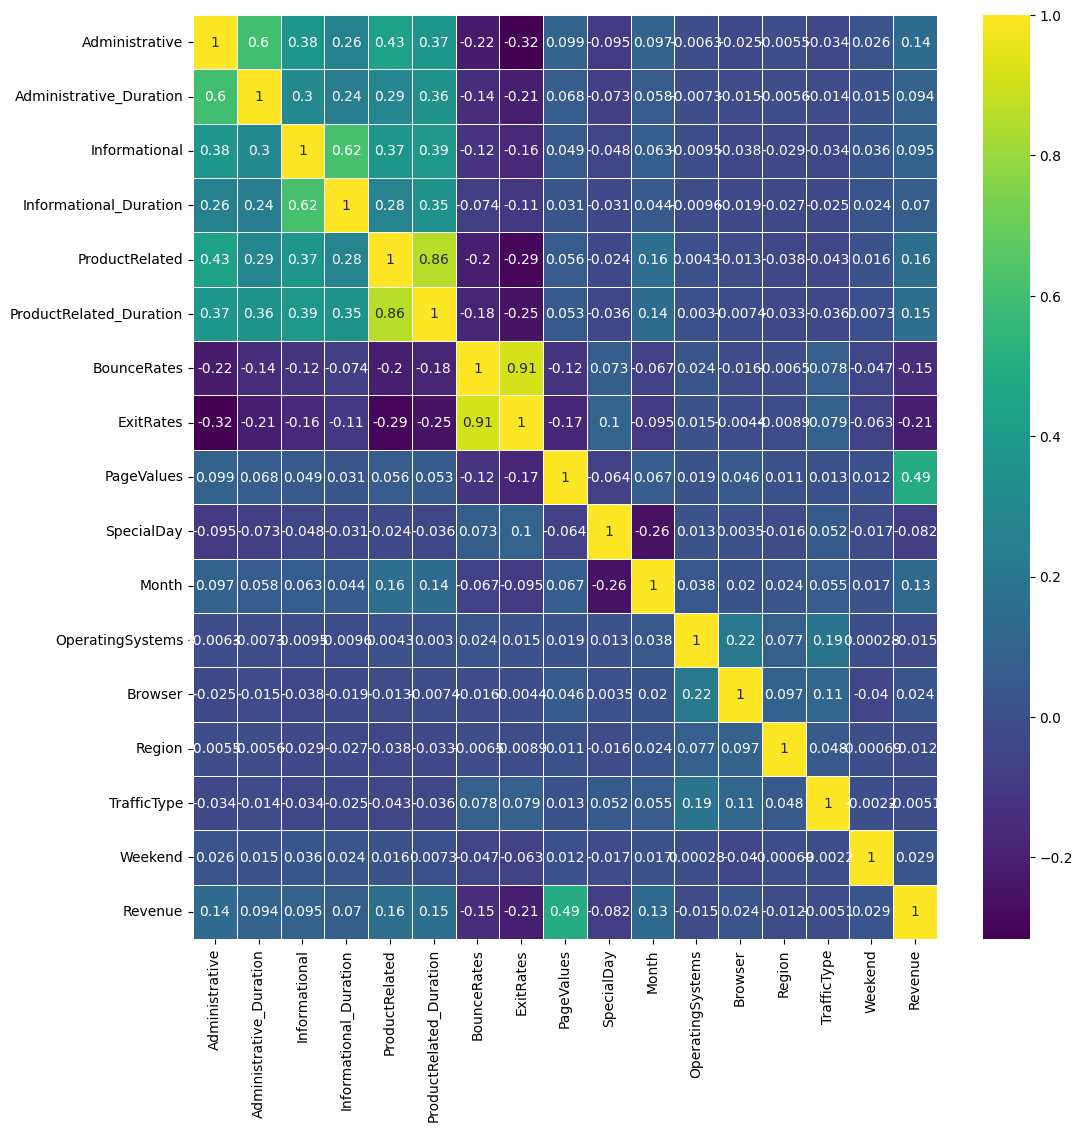

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(),annot=True,cmap='viridis',linewidths=.5)

Based on the above correlation graph

Administrative and Administrative duration
Informational and Infromational Duration
ProductRelated and Product Related Duration are dependent.

Also ExitRates and BounceRates are highly corelated.

To improve model performance we dropped the columns Administrative, Informational ProductRelated and ExitRates columns.




In [ ]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated','ExitRates'], axis=1)

In [ ]:
len(df.columns)

14

In [ ]:
#Preprocessing of Data
from sklearn.preprocessing import LabelEncoder
categorical_columns=['Weekend','Revenue']
for col in categorical_columns:
  encoder=LabelEncoder()
  encoder.fit(df[col])
  print('Column:', col)
  print('Original categories:', encoder.classes_)
  print('Encoded values:', encoder.transform(encoder.classes_))
  print('\n')
  df[col]=encoder.fit_transform(df[col])

Column: Weekend
Original categories: [False  True]
Encoded values: [0 1]


Column: Revenue
Original categories: [False  True]
Encoded values: [0 1]




In [ ]:
print(df.head())

   Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   BounceRates  PageValues  SpecialDay  Month  OperatingSystems  Browser  \
0         0.20         0.0         0.0      2                 1        1   
1         0.00         0.0         0.0      2                 2        2   
2         0.20         0.0         0.0      2                 4        1   
3         0.05         0.0         0.0      2                 3        2   
4         0.02         0.0         0.0      2                 3        3   

   Region  TrafficType        VisitorType  Weekend  Revenue  
0     

In [ ]:
# Identifying duplicated rows
df.duplicated().value_counts()

False    12154
True       176
Name: count, dtype: int64

In [ ]:
duplicated_rows=df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(12154, 14)

In [ ]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [ ]:
import pandas as pd

grouped_data = df.groupby('TrafficType')

average_revenue = grouped_data['Revenue'].mean()

total_revenue = grouped_data['Revenue'].sum()

revenue_comparison = pd.DataFrame({'Average Revenue': average_revenue, 'Total Revenue': total_revenue})

print(revenue_comparison)

             Average Revenue  Total Revenue
TrafficType                                
1                   0.110595            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56
6                   0.119910             53
7                   0.300000             12
8                   0.277778             95
9                   0.097561              4
10                  0.200000             90
11                  0.190283             47
12                  0.000000              0
13                  0.060140             43
14                  0.153846              2
15                  0.000000              0
16                  0.333333              1
17                  0.000000              0
18                  0.000000              0
19                  0.058824              1
20                  0.259067             50


In [ ]:
#Transforming features by scaling each feature to a given range.
cols_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','PageValues','SpecialDay']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
print(df.describe())

       Administrative_Duration  Informational_Duration  \
count             12154.000000            12154.000000   
mean                  0.024123                0.013718   
std                   0.052309                0.055584   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.002942                0.000000   
75%                   0.027951                0.000000   
max                   1.000000                1.000000   

       ProductRelated_Duration   BounceRates    PageValues    SpecialDay  \
count             12154.000000  12154.000000  12154.000000  12154.000000   
mean                  0.018946      0.098330      0.016515      0.061988   
std                   0.030044      0.219580      0.051660      0.199740   
min                   0.000000      0.000000      0.000000      0.000000   
25%                   0.003080      0.000000      0.000000      0.000000   
50%                  

In [ ]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
#To balance class distribution
from imblearn.over_sampling import SMOTE

X_encoded = pd.get_dummies(X)
X_encoded
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_encoded, y)

y_sm = pd.Series(y_sm)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=1000, random_state=0)
rf.fit(X_train, y_train)

# Make predictions on the test set and evaluate model performance
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9277872651866309
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      2050
           1       0.91      0.96      0.93      2049

    accuracy                           0.93      4099
   macro avg       0.93      0.93      0.93      4099
weighted avg       0.93      0.93      0.93      4099



In [ ]:
import pickle
pickle.dump(rf,open('customerRevenue.pkl','wb'))